In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing data

In [2]:
df_train = pd.read_csv("../Data/train.csv")

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_train.shape

(1460, 81)

In [6]:
#dropping the 'Id' column
df_train = df_train.drop('Id', axis = 1)
df_train.shape

(1460, 80)

Showing the null elements

In [7]:
pd.set_option("display.max_columns", None, "display.max_rows", None)
df_train.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [8]:
#we must drop the the features that have more than half missing features
drop_columns = df_train.columns[df_train.isnull().sum() > len(df_train)/2].tolist()
drop_columns

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [9]:
df_train = df_train.drop(drop_columns, axis = 1)
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [10]:
#showing the columns with missing values
missing_columns = df_train.columns[df_train.isnull().sum() != 0]
missing_columns

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [11]:
rest_of_columns = list(set(df_train.columns) - set(missing_columns[0]))
rest_of_columns

['BsmtHalfBath',
 'GrLivArea',
 'MiscVal',
 'TotalBsmtSF',
 'Exterior2nd',
 '1stFlrSF',
 'BsmtExposure',
 'ExterQual',
 'GarageCars',
 'ExterCond',
 'MoSold',
 'MasVnrType',
 'BsmtCond',
 'CentralAir',
 'RoofStyle',
 'GarageQual',
 'LandSlope',
 'BsmtUnfSF',
 'Condition1',
 'LandContour',
 'ScreenPorch',
 'YearRemodAdd',
 'FireplaceQu',
 'KitchenAbvGr',
 'KitchenQual',
 'BsmtFinType2',
 'FullBath',
 'Condition2',
 'GarageYrBlt',
 'GarageFinish',
 'BedroomAbvGr',
 'Functional',
 '2ndFlrSF',
 'BsmtQual',
 'YearBuilt',
 'MSSubClass',
 'HeatingQC',
 'BldgType',
 'MSZoning',
 'LotShape',
 'OverallQual',
 'RoofMatl',
 'MasVnrArea',
 'SaleCondition',
 'YrSold',
 'PavedDrive',
 'Foundation',
 'GarageCond',
 'LotConfig',
 'GarageType',
 'OverallCond',
 'Neighborhood',
 '3SsnPorch',
 'BsmtFinSF1',
 'Fireplaces',
 'Exterior1st',
 'BsmtFinType1',
 'TotRmsAbvGrd',
 'EnclosedPorch',
 'LotArea',
 'SaleType',
 'Utilities',
 'Street',
 'HalfBath',
 'BsmtFinSF2',
 'WoodDeckSF',
 'LotFrontage',
 'OpenPor

In [12]:
numerical_columns = df_train._get_numeric_data().columns
categorical_missing_columns = list(set(missing_columns) - set(numerical_columns))
categorical_missing_columns

['BsmtCond',
 'FireplaceQu',
 'BsmtFinType1',
 'GarageQual',
 'GarageCond',
 'BsmtQual',
 'GarageType',
 'BsmtFinType2',
 'GarageFinish',
 'Electrical',
 'BsmtExposure',
 'MasVnrType']

In [13]:
numeric_missing_columns = list(set(missing_columns) - set(categorical_missing_columns))
numeric_missing_columns

['MasVnrArea', 'LotFrontage', 'GarageYrBlt']

In [14]:
categorical_missing_columns_items = {}
for category in categorical_missing_columns:
    categorical_missing_columns_items[category] = len(df_train[category].value_counts())

categorical_missing_columns_items

{'BsmtCond': 4,
 'FireplaceQu': 5,
 'BsmtFinType1': 6,
 'GarageQual': 5,
 'GarageCond': 5,
 'BsmtQual': 4,
 'GarageType': 6,
 'BsmtFinType2': 6,
 'GarageFinish': 3,
 'Electrical': 5,
 'BsmtExposure': 4,
 'MasVnrType': 4}

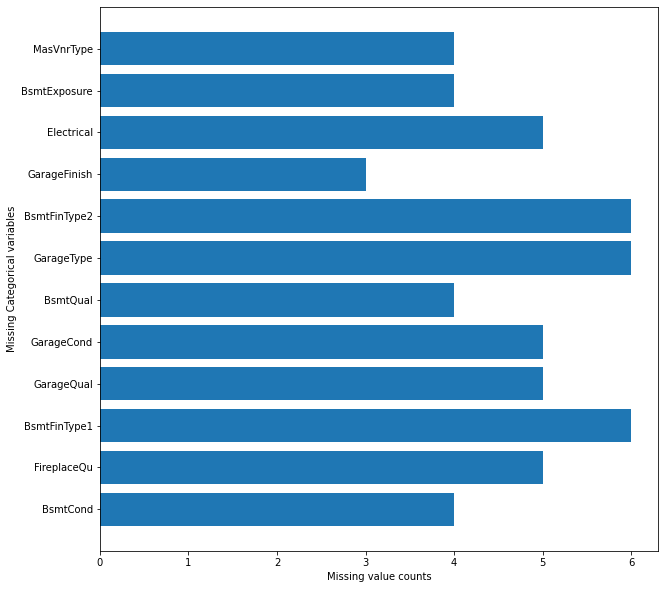

In [15]:
ax, fig = plt.subplots(1, 1, figsize = (10, 10))
plt.barh(range(len(categorical_missing_columns_items)), 
         categorical_missing_columns_items.values(),
         tick_label = [*categorical_missing_columns_items],
         align='center')
plt.ylabel("Missing Categorical variables")
plt.xlabel("Missing value counts")
plt.show()

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy="median"))
])

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy = "most_frequent"))
])

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, numeric_missing_columns),
    ("cat", cat_pipeline, categorical_missing_columns)
])

In [18]:
df_train_prepared_np = full_pipeline.fit_transform(df_train)
df_train_prepared_np

array([[196.0, 65.0, 2003.0, ..., 'SBrkr', 'No', 'BrkFace'],
       [0.0, 80.0, 1976.0, ..., 'SBrkr', 'Gd', 'None'],
       [162.0, 68.0, 2001.0, ..., 'SBrkr', 'Mn', 'BrkFace'],
       ...,
       [0.0, 66.0, 1941.0, ..., 'SBrkr', 'No', 'None'],
       [0.0, 68.0, 1950.0, ..., 'FuseA', 'Mn', 'None'],
       [0.0, 75.0, 1965.0, ..., 'SBrkr', 'No', 'None']], dtype=object)

In [19]:
df_train_prepared_np.shape

(1460, 15)

In [20]:
df_train.shape

(1460, 76)

In [21]:
columns = numeric_missing_columns + categorical_missing_columns
df_train_prepared = pd.DataFrame(df_train_prepared_np, columns = columns)
df_train_prepared.head()

,MasVnrArea,LotFrontage,GarageYrBlt,BsmtCond,FireplaceQu,BsmtFinType1,GarageQual,GarageCond,BsmtQual,GarageType,BsmtFinType2,GarageFinish,Electrical,BsmtExposure,MasVnrType
0,196,65,2003,TA,Gd,GLQ,TA,TA,Gd,Attchd,Unf,RFn,SBrkr,No,BrkFace
1,0,80,1976,TA,TA,ALQ,TA,TA,Gd,Attchd,Unf,RFn,SBrkr,Gd,None
2,162,68,2001,TA,TA,GLQ,TA,TA,Gd,Attchd,Unf,RFn,SBrkr,Mn,BrkFace
3,0,60,1998,Gd,Gd,ALQ,TA,TA,TA,Detchd,Unf,Unf,SBrkr,No,None
4,350,84,2000,TA,TA,GLQ,TA,TA,Gd,Attchd,Unf,RFn,SBrkr,Av,BrkFace


In [22]:
df_train_rest = df_train[rest_of_columns]
df_train_rest.head()

,BsmtHalfBath,GrLivArea,MiscVal,TotalBsmtSF,Exterior2nd,1stFlrSF,BsmtExposure,ExterQual,GarageCars,ExterCond,MoSold,MasVnrType,BsmtCond,CentralAir,RoofStyle,GarageQual,LandSlope,BsmtUnfSF,Condition1,LandContour,ScreenPorch,YearRemodAdd,FireplaceQu,KitchenAbvGr,KitchenQual,BsmtFinType2,FullBath,Condition2,GarageYrBlt,GarageFinish,BedroomAbvGr,Functional,2ndFlrSF,BsmtQual,YearBuilt,MSSubClass,HeatingQC,BldgType,MSZoning,LotShape,OverallQual,RoofMatl,MasVnrArea,SaleCondition,YrSold,PavedDrive,Foundation,GarageCond,LotConfig,GarageType,OverallCond,Neighborhood,3SsnPorch,BsmtFinSF1,Fireplaces,Exterior1st,BsmtFinType1,TotRmsAbvGrd,EnclosedPorch,LotArea,SaleType,Utilities,Street,HalfBath,BsmtFinSF2,WoodDeckSF,LotFrontage,OpenPorchSF,PoolArea,BsmtFullBath,SalePrice,Electrical,HouseStyle,Heating,LowQualFinSF,GarageArea
0,0,1710,0,856,VinylSd,856,No,Gd,2,TA,2,BrkFace,TA,Y,Gable,TA,Gtl,150,Norm,Lvl,0,2003,NaN,1,Gd,Unf,2,Norm,2003.0,RFn,3,Typ,854,Gd,2003,60,Ex,1Fam,RL,Reg,7,CompShg,196.0,Normal,2008,Y,PConc,TA,Inside,Attchd,5,CollgCr,0,706,0,VinylSd,GLQ,8,0,8450,WD,AllPub,Pave,1,0,0,65.0,61,0,1,208500,SBrkr,2Story,GasA,0,548
1,1,1262,0,1262,MetalSd,1262,Gd,TA,2,TA,5,None,TA,Y,Gable,TA,Gtl,284,Feedr,Lvl,0,1976,TA,1,TA,Unf,2,Norm,1976.0,RFn,3,Typ,0,Gd,1976,20,Ex,1Fam,RL,Reg,6,CompShg,0.0,Normal,2007,Y,CBlock,TA,FR2,Attchd,8,Veenker,0,978,1,MetalSd,ALQ,6,0,9600,WD,AllPub,Pave,0,0,298,80.0,0,0,0,181500,SBrkr,1Story,GasA,0,460
2,0,1786,0,920,VinylSd,920,Mn,Gd,2,TA,9,BrkFace,TA,Y,Gable,TA,Gtl,434,Norm,Lvl,0,2002,TA,1,Gd,Unf,2,Norm,2001.0,RFn,3,Typ,866,Gd,2001,60,Ex,1Fam,RL,IR1,7,CompShg,162.0,Normal,2008,Y,PConc,TA,Inside,Attchd,5,CollgCr,0,486,1,VinylSd,GLQ,6,0,11250,WD,AllPub,Pave,1,0,0,68.0,42,0,1,223500,SBrkr,2Story,GasA,0,608
3,0,1717,0,756,Wd Shng,961,No,TA,3,TA,2,None,Gd,Y,Gable,TA,Gtl,540,Norm,Lvl,0,1970,Gd,1,Gd,Unf,1,Norm,1998.0,Unf,3,Typ,756,TA,1915,70,Gd,1Fam,RL,IR1,7,CompShg,0.0,Abnorml,2006,Y,BrkTil,TA,Corner,Detchd,5,Crawfor,0,216,1,Wd Sdng,ALQ,7,272,9550,WD,AllPub,Pave,0,0,0,60.0,35,0,1,140000,SBrkr,2Story,GasA,0,642
4,0,2198,0,1145,VinylSd,1145,Av,Gd,3,TA,12,BrkFace,TA,Y,Gable,TA,Gtl,490,Norm,Lvl,0,2000,TA,1,Gd,Unf,2,Norm,2000.0,RFn,4,Typ,1053,Gd,2000,60,Ex,1Fam,RL,IR1,8,CompShg,350.0,Normal,2008,Y,PConc,TA,FR2,Attchd,5,NoRidge,0,655,1,VinylSd,GLQ,9,0,14260,WD,AllPub,Pave,1,0,192,84.0,84,0,1,250000,SBrkr,2Story,GasA,0,836


In [23]:
final_df_train_prepared = pd.concat([df_train_prepared, df_train_rest], axis=1)
final_df_train_prepared.head()

,MasVnrArea,LotFrontage,GarageYrBlt,BsmtCond,FireplaceQu,BsmtFinType1,GarageQual,GarageCond,BsmtQual,GarageType,BsmtFinType2,GarageFinish,Electrical,BsmtExposure,MasVnrType,BsmtHalfBath,GrLivArea,MiscVal,TotalBsmtSF,Exterior2nd,1stFlrSF,BsmtExposure,ExterQual,GarageCars,ExterCond,MoSold,MasVnrType,BsmtCond,CentralAir,RoofStyle,GarageQual,LandSlope,BsmtUnfSF,Condition1,LandContour,ScreenPorch,YearRemodAdd,FireplaceQu,KitchenAbvGr,KitchenQual,BsmtFinType2,FullBath,Condition2,GarageYrBlt,GarageFinish,BedroomAbvGr,Functional,2ndFlrSF,BsmtQual,YearBuilt,MSSubClass,HeatingQC,BldgType,MSZoning,LotShape,OverallQual,RoofMatl,MasVnrArea,SaleCondition,YrSold,PavedDrive,Foundation,GarageCond,LotConfig,GarageType,OverallCond,Neighborhood,3SsnPorch,BsmtFinSF1,Fireplaces,Exterior1st,BsmtFinType1,TotRmsAbvGrd,EnclosedPorch,LotArea,SaleType,Utilities,Street,HalfBath,BsmtFinSF2,WoodDeckSF,LotFrontage,OpenPorchSF,PoolArea,BsmtFullBath,SalePrice,Electrical,HouseStyle,Heating,LowQualFinSF,GarageArea
0,196,65,2003,TA,Gd,GLQ,TA,TA,Gd,Attchd,Unf,RFn,SBrkr,No,BrkFace,0,1710,0,856,VinylSd,856,No,Gd,2,TA,2,BrkFace,TA,Y,Gable,TA,Gtl,150,Norm,Lvl,0,2003,NaN,1,Gd,Unf,2,Norm,2003.0,RFn,3,Typ,854,Gd,2003,60,Ex,1Fam,RL,Reg,7,CompShg,196.0,Normal,2008,Y,PConc,TA,Inside,Attchd,5,CollgCr,0,706,0,VinylSd,GLQ,8,0,8450,WD,AllPub,Pave,1,0,0,65.0,61,0,1,208500,SBrkr,2Story,GasA,0,548
1,0,80,1976,TA,TA,ALQ,TA,TA,Gd,Attchd,Unf,RFn,SBrkr,Gd,None,1,1262,0,1262,MetalSd,1262,Gd,TA,2,TA,5,None,TA,Y,Gable,TA,Gtl,284,Feedr,Lvl,0,1976,TA,1,TA,Unf,2,Norm,1976.0,RFn,3,Typ,0,Gd,1976,20,Ex,1Fam,RL,Reg,6,CompShg,0.0,Normal,2007,Y,CBlock,TA,FR2,Attchd,8,Veenker,0,978,1,MetalSd,ALQ,6,0,9600,WD,AllPub,Pave,0,0,298,80.0,0,0,0,181500,SBrkr,1Story,GasA,0,460
2,162,68,2001,TA,TA,GLQ,TA,TA,Gd,Attchd,Unf,RFn,SBrkr,Mn,BrkFace,0,1786,0,920,VinylSd,920,Mn,Gd,2,TA,9,BrkFace,TA,Y,Gable,TA,Gtl,434,Norm,Lvl,0,2002,TA,1,Gd,Unf,2,Norm,2001.0,RFn,3,Typ,866,Gd,2001,60,Ex,1Fam,RL,IR1,7,CompShg,162.0,Normal,2008,Y,PConc,TA,Inside,Attchd,5,CollgCr,0,486,1,VinylSd,GLQ,6,0,11250,WD,AllPub,Pave,1,0,0,68.0,42,0,1,223500,SBrkr,2Story,GasA,0,608
3,0,60,1998,Gd,Gd,ALQ,TA,TA,TA,Detchd,Unf,Unf,SBrkr,No,None,0,1717,0,756,Wd Shng,961,No,TA,3,TA,2,None,Gd,Y,Gable,TA,Gtl,540,Norm,Lvl,0,1970,Gd,1,Gd,Unf,1,Norm,1998.0,Unf,3,Typ,756,TA,1915,70,Gd,1Fam,RL,IR1,7,CompShg,0.0,Abnorml,2006,Y,BrkTil,TA,Corner,Detchd,5,Crawfor,0,216,1,Wd Sdng,ALQ,7,272,9550,WD,AllPub,Pave,0,0,0,60.0,35,0,1,140000,SBrkr,2Story,GasA,0,642
4,350,84,2000,TA,TA,GLQ,TA,TA,Gd,Attchd,Unf,RFn,SBrkr,Av,BrkFace,0,2198,0,1145,VinylSd,1145,Av,Gd,3,TA,12,BrkFace,TA,Y,Gable,TA,Gtl,490,Norm,Lvl,0,2000,TA,1,Gd,Unf,2,Norm,2000.0,RFn,4,Typ,1053,Gd,2000,60,Ex,1Fam,RL,IR1,8,CompShg,350.0,Normal,2008,Y,PConc,TA,FR2,Attchd,5,NoRidge,0,655,1,VinylSd,GLQ,9,0,14260,WD,AllPub,Pave,1,0,192,84.0,84,0,1,250000,SBrkr,2Story,GasA,0,836


In [24]:
y = pd.DataFrame(final_df_train_prepared['SalePrice'])
final_df_train_prepared.drop(['SalePrice'], axis = 1)
final_df_train_prepared = pd.concat([final_df_train_prepared, y], axis = 1)
final_df_train_prepared = final_df_train_prepared.loc[:,~final_df_train_prepared.columns.duplicated()]
final_df_train_prepared.head()

,MasVnrArea,LotFrontage,GarageYrBlt,BsmtCond,FireplaceQu,BsmtFinType1,GarageQual,GarageCond,BsmtQual,GarageType,BsmtFinType2,GarageFinish,Electrical,BsmtExposure,MasVnrType,BsmtHalfBath,GrLivArea,MiscVal,TotalBsmtSF,Exterior2nd,1stFlrSF,ExterQual,GarageCars,ExterCond,MoSold,CentralAir,RoofStyle,LandSlope,BsmtUnfSF,Condition1,LandContour,ScreenPorch,YearRemodAdd,KitchenAbvGr,KitchenQual,FullBath,Condition2,BedroomAbvGr,Functional,2ndFlrSF,YearBuilt,MSSubClass,HeatingQC,BldgType,MSZoning,LotShape,OverallQual,RoofMatl,SaleCondition,YrSold,PavedDrive,Foundation,LotConfig,OverallCond,Neighborhood,3SsnPorch,BsmtFinSF1,Fireplaces,Exterior1st,TotRmsAbvGrd,EnclosedPorch,LotArea,SaleType,Utilities,Street,HalfBath,BsmtFinSF2,WoodDeckSF,OpenPorchSF,PoolArea,BsmtFullBath,SalePrice,HouseStyle,Heating,LowQualFinSF,GarageArea
0,196,65,2003,TA,Gd,GLQ,TA,TA,Gd,Attchd,Unf,RFn,SBrkr,No,BrkFace,0,1710,0,856,VinylSd,856,Gd,2,TA,2,Y,Gable,Gtl,150,Norm,Lvl,0,2003,1,Gd,2,Norm,3,Typ,854,2003,60,Ex,1Fam,RL,Reg,7,CompShg,Normal,2008,Y,PConc,Inside,5,CollgCr,0,706,0,VinylSd,8,0,8450,WD,AllPub,Pave,1,0,0,61,0,1,208500,2Story,GasA,0,548
1,0,80,1976,TA,TA,ALQ,TA,TA,Gd,Attchd,Unf,RFn,SBrkr,Gd,None,1,1262,0,1262,MetalSd,1262,TA,2,TA,5,Y,Gable,Gtl,284,Feedr,Lvl,0,1976,1,TA,2,Norm,3,Typ,0,1976,20,Ex,1Fam,RL,Reg,6,CompShg,Normal,2007,Y,CBlock,FR2,8,Veenker,0,978,1,MetalSd,6,0,9600,WD,AllPub,Pave,0,0,298,0,0,0,181500,1Story,GasA,0,460
2,162,68,2001,TA,TA,GLQ,TA,TA,Gd,Attchd,Unf,RFn,SBrkr,Mn,BrkFace,0,1786,0,920,VinylSd,920,Gd,2,TA,9,Y,Gable,Gtl,434,Norm,Lvl,0,2002,1,Gd,2,Norm,3,Typ,866,2001,60,Ex,1Fam,RL,IR1,7,CompShg,Normal,2008,Y,PConc,Inside,5,CollgCr,0,486,1,VinylSd,6,0,11250,WD,AllPub,Pave,1,0,0,42,0,1,223500,2Story,GasA,0,608
3,0,60,1998,Gd,Gd,ALQ,TA,TA,TA,Detchd,Unf,Unf,SBrkr,No,None,0,1717,0,756,Wd Shng,961,TA,3,TA,2,Y,Gable,Gtl,540,Norm,Lvl,0,1970,1,Gd,1,Norm,3,Typ,756,1915,70,Gd,1Fam,RL,IR1,7,CompShg,Abnorml,2006,Y,BrkTil,Corner,5,Crawfor,0,216,1,Wd Sdng,7,272,9550,WD,AllPub,Pave,0,0,0,35,0,1,140000,2Story,GasA,0,642
4,350,84,2000,TA,TA,GLQ,TA,TA,Gd,Attchd,Unf,RFn,SBrkr,Av,BrkFace,0,2198,0,1145,VinylSd,1145,Gd,3,TA,12,Y,Gable,Gtl,490,Norm,Lvl,0,2000,1,Gd,2,Norm,4,Typ,1053,2000,60,Ex,1Fam,RL,IR1,8,CompShg,Normal,2008,Y,PConc,FR2,5,NoRidge,0,655,1,VinylSd,9,0,14260,WD,AllPub,Pave,1,0,192,84,0,1,250000,2Story,GasA,0,836


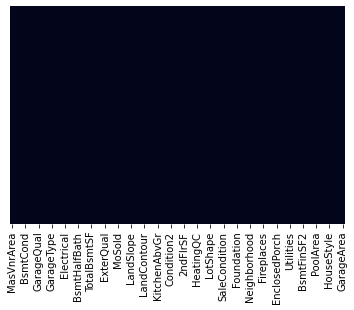

In [25]:
sns.heatmap(final_df_train_prepared.isnull(), yticklabels = False, cbar = False);

In [26]:
final_df_test_prepared = pd.read_csv("../Data/final_df_test_prepared")
final_df_test_prepared = final_df_test_prepared.drop(["Unnamed: 0"], axis = 1)
final_df_test_prepared = final_df_test_prepared.loc[:,~final_df_test_prepared.columns.duplicated()]
final_df_test_prepared.head()

,BsmtUnfSF,MasVnrArea,GarageYrBlt,TotalBsmtSF,BsmtFullBath,LotFrontage,BsmtFinSF1,BsmtHalfBath,GarageCars,BsmtFinSF2,GarageArea,BsmtCond,BsmtFinType1,FireplaceQu,GarageCond,GarageQual,MasVnrType,BsmtFinType2,BsmtExposure,GarageType,Functional,BsmtQual,MSZoning,KitchenQual,GarageFinish,Utilities,SaleType,Exterior2nd,Exterior1st,MiscVal,MoSold,SaleCondition,OverallQual,Condition2,ExterCond,3SsnPorch,HalfBath,OpenPorchSF,HeatingQC,Fireplaces,ExterQual,EnclosedPorch,PoolArea,MSSubClass,BldgType,2ndFlrSF,Electrical,Neighborhood,RoofMatl,HouseStyle,Foundation,YrSold,LandContour,LandSlope,Heating,LotConfig,ScreenPorch,YearRemodAdd,BedroomAbvGr,LotArea,OverallCond,KitchenAbvGr,CentralAir,LowQualFinSF,TotRmsAbvGrd,RoofStyle,Street,Condition1,WoodDeckSF,FullBath,YearBuilt,1stFlrSF,GrLivArea,LotShape,PavedDrive
0,270.0,0.0,1961.0,882.0,0.0,80.0,468.0,0.0,1.0,144.0,730.0,TA,Rec,Gd,TA,TA,None,LwQ,No,Attchd,Typ,TA,RH,TA,Unf,AllPub,WD,VinylSd,VinylSd,0,6,Normal,5,Norm,TA,0,0,0,TA,0,TA,0,0,20,1Fam,0,SBrkr,NAmes,CompShg,1Story,CBlock,2010,Lvl,Gtl,GasA,Inside,120,1961,2,11622,6,1,Y,0,5,Gable,Pave,Feedr,140,1,1961,896,896,Reg,Y
1,406.0,108.0,1958.0,1329.0,0.0,81.0,923.0,0.0,1.0,0.0,312.0,TA,ALQ,Gd,TA,TA,BrkFace,Unf,No,Attchd,Typ,TA,RL,Gd,Unf,AllPub,WD,Wd Sdng,Wd Sdng,12500,6,Normal,6,Norm,TA,0,1,36,TA,0,TA,0,0,20,1Fam,0,SBrkr,NAmes,CompShg,1Story,CBlock,2010,Lvl,Gtl,GasA,Corner,0,1958,3,14267,6,1,Y,0,6,Hip,Pave,Norm,393,1,1958,1329,1329,IR1,Y
2,137.0,0.0,1997.0,928.0,0.0,74.0,791.0,0.0,2.0,0.0,482.0,TA,GLQ,TA,TA,TA,None,Unf,No,Attchd,Typ,Gd,RL,TA,Fin,AllPub,WD,VinylSd,VinylSd,0,3,Normal,5,Norm,TA,0,1,34,Gd,1,TA,0,0,60,1Fam,701,SBrkr,Gilbert,CompShg,2Story,PConc,2010,Lvl,Gtl,GasA,Inside,0,1998,3,13830,5,1,Y,0,6,Gable,Pave,Norm,212,2,1997,928,1629,IR1,Y
3,324.0,20.0,1998.0,926.0,0.0,78.0,602.0,0.0,2.0,0.0,470.0,TA,GLQ,Gd,TA,TA,BrkFace,Unf,No,Attchd,Typ,TA,RL,Gd,Fin,AllPub,WD,VinylSd,VinylSd,0,6,Normal,6,Norm,TA,0,1,36,Ex,1,TA,0,0,60,1Fam,678,SBrkr,Gilbert,CompShg,2Story,PConc,2010,Lvl,Gtl,GasA,Inside,0,1998,3,9978,6,1,Y,0,7,Gable,Pave,Norm,360,2,1998,926,1604,IR1,Y
4,1017.0,0.0,1992.0,1280.0,0.0,43.0,263.0,0.0,2.0,0.0,506.0,TA,ALQ,Gd,TA,TA,None,Unf,No,Attchd,Typ,Gd,RL,Gd,RFn,AllPub,WD,HdBoard,HdBoard,0,1,Normal,8,Norm,TA,0,0,82,Ex,0,Gd,0,0,120,TwnhsE,0,SBrkr,StoneBr,CompShg,1Story,PConc,2010,HLS,Gtl,GasA,Inside,144,1992,2,5005,5,1,Y,0,5,Gable,Pave,Norm,0,2,1992,1280,1280,IR1,Y


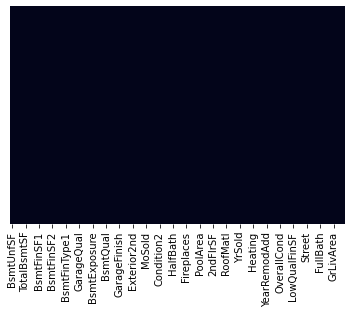

In [27]:
sns.heatmap(final_df_test_prepared.isnull(), yticklabels = False, cbar = False);

In [28]:
final_df_test_prepared.shape

(1459, 75)

In [29]:
final_df_train_prepared.shape

(1460, 76)

Creating dummy variables.

In [30]:
final_df_test_dummy = pd.get_dummies(final_df_test_prepared, columns = categorical_missing_columns)
final_df_test_dummy.head()

,BsmtUnfSF,MasVnrArea,GarageYrBlt,TotalBsmtSF,BsmtFullBath,LotFrontage,BsmtFinSF1,BsmtHalfBath,GarageCars,BsmtFinSF2,GarageArea,Functional,MSZoning,KitchenQual,Utilities,SaleType,Exterior2nd,Exterior1st,MiscVal,MoSold,SaleCondition,OverallQual,Condition2,ExterCond,3SsnPorch,HalfBath,OpenPorchSF,HeatingQC,Fireplaces,ExterQual,EnclosedPorch,PoolArea,MSSubClass,BldgType,2ndFlrSF,Neighborhood,RoofMatl,HouseStyle,Foundation,YrSold,LandContour,LandSlope,Heating,LotConfig,ScreenPorch,YearRemodAdd,BedroomAbvGr,LotArea,OverallCond,KitchenAbvGr,CentralAir,LowQualFinSF,TotRmsAbvGrd,RoofStyle,Street,Condition1,WoodDeckSF,FullBath,YearBuilt,1stFlrSF,GrLivArea,LotShape,PavedDrive,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,270.0,0.0,1961.0,882.0,0.0,80.0,468.0,0.0,1.0,144.0,730.0,Typ,RH,TA,AllPub,WD,VinylSd,VinylSd,0,6,Normal,5,Norm,TA,0,0,0,TA,0,TA,0,0,20,1Fam,0,NAmes,CompShg,1Story,CBlock,2010,Lvl,Gtl,GasA,Inside,120,1961,2,11622,6,1,Y,0,5,Gable,Pave,Feedr,140,1,1961,896,896,Reg,Y,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
1,406.0,108.0,1958.0,1329.0,0.0,81.0,923.0,0.0,1.0,0.0,312.0,Typ,RL,Gd,AllPub,WD,Wd Sdng,Wd Sdng,12500,6,Normal,6,Norm,TA,0,1,36,TA,0,TA,0,0,20,1Fam,0,NAmes,CompShg,1Story,CBlock,2010,Lvl,Gtl,GasA,Corner,0,1958,3,14267,6,1,Y,0,6,Hip,Pave,Norm,393,1,1958,1329,1329,IR1,Y,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
2,137.0,0.0,1997.0,928.0,0.0,74.0,791.0,0.0,2.0,0.0,482.0,Typ,RL,TA,AllPub,WD,VinylSd,VinylSd,0,3,Normal,5,Norm,TA,0,1,34,Gd,1,TA,0,0,60,1Fam,701,Gilbert,CompShg,2Story,PConc,2010,Lvl,Gtl,GasA,Inside,0,1998,3,13830,5,1,Y,0,6,Gable,Pave,Norm,212,2,1997,928,1629,IR1,Y,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0
3,324.0,20.0,1998.0,926.0,0.0,78.0,602.0,0.0,2.0,0.0,470.0,Typ,RL,Gd,AllPub,WD,VinylSd,VinylSd,0,6,Normal,6,Norm,TA,0,1,36,Ex,1,TA,0,0,60,1Fam,678,Gilbert,CompShg,2Story,PConc,2010,Lvl,Gtl,GasA,Inside,0,1998,3,9978,6,1,Y,0,7,Gable,Pave,Norm,360,2,1998,926,1604,IR1,Y,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0
4,1017.0,0.0,1992.0,1280.0,0.0,43.0,263.0,0.0,2.0,0.0,506.0,Typ,RL,Gd,AllPub,WD,HdBoard,HdBoard,0,1,Normal,8,Norm,TA,0,0,82,Ex,0,Gd,0,0,120,TwnhsE,0,StoneBr,CompShg,1Story,PConc,2010,HLS,Gtl,GasA,Inside,144,1992,2,5005,5,1,Y,0,5,Gable,Pave,Norm,0,2,1992,1280,1280,IR1,Y,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0


In [31]:
final_df_test_dummy.shape

(1459, 118)

In [32]:
final_df_train_dummy = pd.get_dummies(final_df_train_prepared, columns = categorical_missing_columns)
final_df_train_dummy.head()

,MasVnrArea,LotFrontage,GarageYrBlt,BsmtHalfBath,GrLivArea,MiscVal,TotalBsmtSF,Exterior2nd,1stFlrSF,ExterQual,GarageCars,ExterCond,MoSold,CentralAir,RoofStyle,LandSlope,BsmtUnfSF,Condition1,LandContour,ScreenPorch,YearRemodAdd,KitchenAbvGr,KitchenQual,FullBath,Condition2,BedroomAbvGr,Functional,2ndFlrSF,YearBuilt,MSSubClass,HeatingQC,BldgType,MSZoning,LotShape,OverallQual,RoofMatl,SaleCondition,YrSold,PavedDrive,Foundation,LotConfig,OverallCond,Neighborhood,3SsnPorch,BsmtFinSF1,Fireplaces,Exterior1st,TotRmsAbvGrd,EnclosedPorch,LotArea,SaleType,Utilities,Street,HalfBath,BsmtFinSF2,WoodDeckSF,OpenPorchSF,PoolArea,BsmtFullBath,SalePrice,HouseStyle,Heating,LowQualFinSF,GarageArea,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,196,65,2003,0,1710,0,856,VinylSd,856,Gd,2,TA,2,Y,Gable,Gtl,150,Norm,Lvl,0,2003,1,Gd,2,Norm,3,Typ,854,2003,60,Ex,1Fam,RL,Reg,7,CompShg,Normal,2008,Y,PConc,Inside,5,CollgCr,0,706,0,VinylSd,8,0,8450,WD,AllPub,Pave,1,0,0,61,0,1,208500,2Story,GasA,0,548,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0
1,0,80,1976,1,1262,0,1262,MetalSd,1262,TA,2,TA,5,Y,Gable,Gtl,284,Feedr,Lvl,0,1976,1,TA,2,Norm,3,Typ,0,1976,20,Ex,1Fam,RL,Reg,6,CompShg,Normal,2007,Y,CBlock,FR2,8,Veenker,0,978,1,MetalSd,6,0,9600,WD,AllPub,Pave,0,0,298,0,0,0,181500,1Story,GasA,0,460,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
2,162,68,2001,0,1786,0,920,VinylSd,920,Gd,2,TA,9,Y,Gable,Gtl,434,Norm,Lvl,0,2002,1,Gd,2,Norm,3,Typ,866,2001,60,Ex,1Fam,RL,IR1,7,CompShg,Normal,2008,Y,PConc,Inside,5,CollgCr,0,486,1,VinylSd,6,0,11250,WD,AllPub,Pave,1,0,0,42,0,1,223500,2Story,GasA,0,608,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0
3,0,60,1998,0,1717,0,756,Wd Shng,961,TA,3,TA,2,Y,Gable,Gtl,540,Norm,Lvl,0,1970,1,Gd,1,Norm,3,Typ,756,1915,70,Gd,1Fam,RL,IR1,7,CompShg,Abnorml,2006,Y,BrkTil,Corner,5,Crawfor,0,216,1,Wd Sdng,7,272,9550,WD,AllPub,Pave,0,0,0,35,0,1,140000,2Story,GasA,0,642,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
4,350,84,2000,0,2198,0,1145,VinylSd,1145,Gd,3,TA,12,Y,Gable,Gtl,490,Norm,Lvl,0,2000,1,Gd,2,Norm,4,Typ,1053,2000,60,Ex,1Fam,RL,IR1,8,CompShg,Normal,2008,Y,PConc,FR2,5,NoRidge,0,655,1,VinylSd,9,0,14260,WD,AllPub,Pave,1,0,192,84,0,1,250000,2Story,GasA,0,836,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0


In [33]:
final_df_train_dummy.shape

(1460, 121)

In [34]:
set(final_df_train_dummy) - set(final_df_test_dummy)

{'Electrical_Mix', 'GarageQual_Ex', 'SalePrice'}

In [35]:
num_train = final_df_train_prepared._get_numeric_data()
cat_train = list(set(final_df_train_prepared.columns) - set(num_train))
len(cat_train)

42

In [36]:
num_test = final_df_test_prepared._get_numeric_data()
cat_test = list(set(final_df_test_prepared.columns) - set(num_test))
len(cat_test)

39

In [37]:
num_test = final_df_test_prepared._get_numeric_data().columns
num_test

Index(['BsmtUnfSF', 'MasVnrArea', 'GarageYrBlt', 'TotalBsmtSF', 'BsmtFullBath',
       'LotFrontage', 'BsmtFinSF1', 'BsmtHalfBath', 'GarageCars', 'BsmtFinSF2',
       'GarageArea', 'MiscVal', 'MoSold', 'OverallQual', '3SsnPorch',
       'HalfBath', 'OpenPorchSF', 'Fireplaces', 'EnclosedPorch', 'PoolArea',
       'MSSubClass', '2ndFlrSF', 'YrSold', 'ScreenPorch', 'YearRemodAdd',
       'BedroomAbvGr', 'LotArea', 'OverallCond', 'KitchenAbvGr',
       'LowQualFinSF', 'TotRmsAbvGrd', 'WoodDeckSF', 'FullBath', 'YearBuilt',
       '1stFlrSF', 'GrLivArea'],
      dtype='object')

Concatinating the train and test data row wise.

In [38]:
# Separating the 'SalePrice' column in order to avoid nan values
target = pd.DataFrame(final_df_train_prepared['SalePrice'])
final_df_train_prepared = final_df_train_prepared.drop(['SalePrice'], axis = 1)

In [39]:
df_total_prepared = pd.concat([final_df_train_prepared, final_df_test_prepared], axis = 0)
df_total_prepared.head()

,MasVnrArea,LotFrontage,GarageYrBlt,BsmtCond,FireplaceQu,BsmtFinType1,GarageQual,GarageCond,BsmtQual,GarageType,BsmtFinType2,GarageFinish,Electrical,BsmtExposure,MasVnrType,BsmtHalfBath,GrLivArea,MiscVal,TotalBsmtSF,Exterior2nd,1stFlrSF,ExterQual,GarageCars,ExterCond,MoSold,CentralAir,RoofStyle,LandSlope,BsmtUnfSF,Condition1,LandContour,ScreenPorch,YearRemodAdd,KitchenAbvGr,KitchenQual,FullBath,Condition2,BedroomAbvGr,Functional,2ndFlrSF,YearBuilt,MSSubClass,HeatingQC,BldgType,MSZoning,LotShape,OverallQual,RoofMatl,SaleCondition,YrSold,PavedDrive,Foundation,LotConfig,OverallCond,Neighborhood,3SsnPorch,BsmtFinSF1,Fireplaces,Exterior1st,TotRmsAbvGrd,EnclosedPorch,LotArea,SaleType,Utilities,Street,HalfBath,BsmtFinSF2,WoodDeckSF,OpenPorchSF,PoolArea,BsmtFullBath,HouseStyle,Heating,LowQualFinSF,GarageArea
0,196,65,2003,TA,Gd,GLQ,TA,TA,Gd,Attchd,Unf,RFn,SBrkr,No,BrkFace,0.0,1710,0,856.0,VinylSd,856,Gd,2.0,TA,2,Y,Gable,Gtl,150.0,Norm,Lvl,0,2003,1,Gd,2,Norm,3,Typ,854,2003,60,Ex,1Fam,RL,Reg,7,CompShg,Normal,2008,Y,PConc,Inside,5,CollgCr,0,706.0,0,VinylSd,8,0,8450,WD,AllPub,Pave,1,0.0,0,61,0,1.0,2Story,GasA,0,548.0
1,0,80,1976,TA,TA,ALQ,TA,TA,Gd,Attchd,Unf,RFn,SBrkr,Gd,None,1.0,1262,0,1262.0,MetalSd,1262,TA,2.0,TA,5,Y,Gable,Gtl,284.0,Feedr,Lvl,0,1976,1,TA,2,Norm,3,Typ,0,1976,20,Ex,1Fam,RL,Reg,6,CompShg,Normal,2007,Y,CBlock,FR2,8,Veenker,0,978.0,1,MetalSd,6,0,9600,WD,AllPub,Pave,0,0.0,298,0,0,0.0,1Story,GasA,0,460.0
2,162,68,2001,TA,TA,GLQ,TA,TA,Gd,Attchd,Unf,RFn,SBrkr,Mn,BrkFace,0.0,1786,0,920.0,VinylSd,920,Gd,2.0,TA,9,Y,Gable,Gtl,434.0,Norm,Lvl,0,2002,1,Gd,2,Norm,3,Typ,866,2001,60,Ex,1Fam,RL,IR1,7,CompShg,Normal,2008,Y,PConc,Inside,5,CollgCr,0,486.0,1,VinylSd,6,0,11250,WD,AllPub,Pave,1,0.0,0,42,0,1.0,2Story,GasA,0,608.0
3,0,60,1998,Gd,Gd,ALQ,TA,TA,TA,Detchd,Unf,Unf,SBrkr,No,None,0.0,1717,0,756.0,Wd Shng,961,TA,3.0,TA,2,Y,Gable,Gtl,540.0,Norm,Lvl,0,1970,1,Gd,1,Norm,3,Typ,756,1915,70,Gd,1Fam,RL,IR1,7,CompShg,Abnorml,2006,Y,BrkTil,Corner,5,Crawfor,0,216.0,1,Wd Sdng,7,272,9550,WD,AllPub,Pave,0,0.0,0,35,0,1.0,2Story,GasA,0,642.0
4,350,84,2000,TA,TA,GLQ,TA,TA,Gd,Attchd,Unf,RFn,SBrkr,Av,BrkFace,0.0,2198,0,1145.0,VinylSd,1145,Gd,3.0,TA,12,Y,Gable,Gtl,490.0,Norm,Lvl,0,2000,1,Gd,2,Norm,4,Typ,1053,2000,60,Ex,1Fam,RL,IR1,8,CompShg,Normal,2008,Y,PConc,FR2,5,NoRidge,0,655.0,1,VinylSd,9,0,14260,WD,AllPub,Pave,1,0.0,192,84,0,1.0,2Story,GasA,0,836.0


In [40]:
df_total_prepared.shape

(2919, 75)

In [41]:
df_total_prepared[cat_train].head()

,Functional,BsmtQual,HeatingQC,BldgType,Exterior2nd,RoofMatl,SaleCondition,MasVnrArea,MSZoning,LotShape,BsmtExposure,ExterQual,PavedDrive,Foundation,GarageCond,LotConfig,GarageType,Neighborhood,ExterCond,MasVnrType,BsmtCond,Exterior1st,CentralAir,BsmtFinType1,RoofStyle,GarageQual,LandSlope,SaleType,Utilities,Street,Condition1,LandContour,FireplaceQu,LotFrontage,GarageFinish,GarageYrBlt,BsmtFinType2,KitchenQual,Condition2,Electrical,HouseStyle,Heating
0,Typ,Gd,Ex,1Fam,VinylSd,CompShg,Normal,196,RL,Reg,No,Gd,Y,PConc,TA,Inside,Attchd,CollgCr,TA,BrkFace,TA,VinylSd,Y,GLQ,Gable,TA,Gtl,WD,AllPub,Pave,Norm,Lvl,Gd,65,RFn,2003,Unf,Gd,Norm,SBrkr,2Story,GasA
1,Typ,Gd,Ex,1Fam,MetalSd,CompShg,Normal,0,RL,Reg,Gd,TA,Y,CBlock,TA,FR2,Attchd,Veenker,TA,None,TA,MetalSd,Y,ALQ,Gable,TA,Gtl,WD,AllPub,Pave,Feedr,Lvl,TA,80,RFn,1976,Unf,TA,Norm,SBrkr,1Story,GasA
2,Typ,Gd,Ex,1Fam,VinylSd,CompShg,Normal,162,RL,IR1,Mn,Gd,Y,PConc,TA,Inside,Attchd,CollgCr,TA,BrkFace,TA,VinylSd,Y,GLQ,Gable,TA,Gtl,WD,AllPub,Pave,Norm,Lvl,TA,68,RFn,2001,Unf,Gd,Norm,SBrkr,2Story,GasA
3,Typ,TA,Gd,1Fam,Wd Shng,CompShg,Abnorml,0,RL,IR1,No,TA,Y,BrkTil,TA,Corner,Detchd,Crawfor,TA,None,Gd,Wd Sdng,Y,ALQ,Gable,TA,Gtl,WD,AllPub,Pave,Norm,Lvl,Gd,60,Unf,1998,Unf,Gd,Norm,SBrkr,2Story,GasA
4,Typ,Gd,Ex,1Fam,VinylSd,CompShg,Normal,350,RL,IR1,Av,Gd,Y,PConc,TA,FR2,Attchd,NoRidge,TA,BrkFace,TA,VinylSd,Y,GLQ,Gable,TA,Gtl,WD,AllPub,Pave,Norm,Lvl,TA,84,RFn,2000,Unf,Gd,Norm,SBrkr,2Story,GasA


In [42]:
def category_dummy_encoder(final_df, multicol):
    
    print("Performing One-Hot-Encoding on: ")
    df_final = final_df
    i = 0
    
    for fields in multicol:
        
        print(fields)
        df1 = pd.get_dummies(final_df[fields], drop_first = True)
        
        final_df.drop([fields], axis = 1, inplace = True)
        
        if i == 0:
            df_final = df1.copy()
        else:
            df_final = pd.concat([df_final, df1], axis = 1)
        i = i+1
    
    df_final = pd.concat([final_df, df_final], axis = 1)
    return df_final

In [43]:
df_total_prepared_main = df_total_prepared.copy()

In [44]:
df_final_dummy = category_dummy_encoder(df_total_prepared, cat_test)

Performing One-Hot-Encoding on: 
Functional
BsmtQual
HeatingQC
BldgType
RoofMatl
Exterior2nd
SaleCondition
MSZoning
LotShape
BsmtExposure
ExterQual
PavedDrive
Foundation
GarageCond
LotConfig
GarageType
Neighborhood
ExterCond
MasVnrType
BsmtCond
Exterior1st
CentralAir
BsmtFinType1
RoofStyle
GarageQual
LandSlope
SaleType
Utilities
Street
Condition1
LandContour
FireplaceQu
KitchenQual
BsmtFinType2
GarageFinish
Condition2
Electrical
HouseStyle
Heating


In [45]:
df_final_dummy.shape

(2919, 236)

In [46]:
df_final_dummy.head()

,MasVnrArea,LotFrontage,GarageYrBlt,BsmtHalfBath,GrLivArea,MiscVal,TotalBsmtSF,1stFlrSF,GarageCars,MoSold,BsmtUnfSF,ScreenPorch,YearRemodAdd,KitchenAbvGr,FullBath,BedroomAbvGr,2ndFlrSF,YearBuilt,MSSubClass,OverallQual,YrSold,OverallCond,3SsnPorch,BsmtFinSF1,Fireplaces,TotRmsAbvGrd,EnclosedPorch,LotArea,HalfBath,BsmtFinSF2,WoodDeckSF,OpenPorchSF,PoolArea,BsmtFullBath,LowQualFinSF,GarageArea,Maj2,Min1,Min2,Mod,Sev,Typ,Fa,Gd,TA,Fa,Gd,Po,TA,2fmCon,Duplex,Twnhs,TwnhsE,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,AdjLand,Alloca,Family,Normal,Partial,FV,RH,RL,RM,IR2,IR3,Reg,Gd,Mn,No,Fa,Gd,TA,P,Y,CBlock,PConc,Slab,Stone,Wood,Fa,Gd,Po,TA,CulDSac,FR2,FR3,Inside,Attchd,Basment,BuiltIn,CarPort,Detchd,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Fa,Gd,Po,TA,BrkFace,None,Stone,Gd,Po,TA,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,Y,BLQ,GLQ,LwQ,Rec,Unf,Gable,Gambrel,Hip,Mansard,Shed,Fa,Gd,Po,TA,Mod,Sev,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,NoSeWa,Pave,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,HLS,Low,Lvl,Fa,Gd,Po,TA,Fa,Gd,TA,BLQ,GLQ,LwQ,Rec,Unf,RFn,Unf,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,FuseF,FuseP,Mix,SBrkr,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,GasA,GasW,Grav,OthW,Wall
0,196,65,2003,0.0,1710,0,856.0,856,2.0,2,150.0,0,2003,1,2,3,854,2003,60,7,2008,5,0,706.0,0,8,0,8450,1,0.0,0,61,0,1.0,0,548.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
1,0,80,1976,1.0,1262,0,1262.0,1262,2.0,5,284.0,0,1976,1,2,3,0,1976,20,6,2007,8,0,978.0,1,6,0,9600,0,0.0,298,0,0,0.0,0,460.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,162,68,2001,0.0,1786,0,920.0,920,2.0,9,434.0,0,2002,1,2,3,866,2001,60,7,2008,5,0,486.0,1,6,0,11250,1,0.0,0,42,0,1.0,0,608.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
3,0,60,1998,0.0,1717,0,756.0,961,3.0,2,540.0,0,1970,1,1,3,756,1915,70,7,2006,5,0,216.0,1,7,272,9550,0,0.0,0,35,0,1.0,0,642.0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
4,350,84,2000,0.0,2198,0,1145.0,1145,3.0,12,490.0,0,2000,1,2,4,1053,2000,60,8,2008,5,0,655.0,1,9,0,14260,1,0.0,192,84,0,1.0,0,836.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0

Again separating the training and testing data now that both the training and testing data have the same unique values in each category.

In [47]:
df_train_final = df_final_dummy.iloc[0: 1460, :]
df_train_final = pd.concat([df_train_final, target], axis = 1)

In [48]:
df_test_final = df_final_dummy.iloc[1460:, :]

In [49]:
df_train_final.shape

(1460, 237)

In [50]:
df_test_final.shape

(1459, 236)

In [51]:
df_train_final.head()

,MasVnrArea,LotFrontage,GarageYrBlt,BsmtHalfBath,GrLivArea,MiscVal,TotalBsmtSF,1stFlrSF,GarageCars,MoSold,BsmtUnfSF,ScreenPorch,YearRemodAdd,KitchenAbvGr,FullBath,BedroomAbvGr,2ndFlrSF,YearBuilt,MSSubClass,OverallQual,YrSold,OverallCond,3SsnPorch,BsmtFinSF1,Fireplaces,TotRmsAbvGrd,EnclosedPorch,LotArea,HalfBath,BsmtFinSF2,WoodDeckSF,OpenPorchSF,PoolArea,BsmtFullBath,LowQualFinSF,GarageArea,Maj2,Min1,Min2,Mod,Sev,Typ,Fa,Gd,TA,Fa,Gd,Po,TA,2fmCon,Duplex,Twnhs,TwnhsE,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,AdjLand,Alloca,Family,Normal,Partial,FV,RH,RL,RM,IR2,IR3,Reg,Gd,Mn,No,Fa,Gd,TA,P,Y,CBlock,PConc,Slab,Stone,Wood,Fa,Gd,Po,TA,CulDSac,FR2,FR3,Inside,Attchd,Basment,BuiltIn,CarPort,Detchd,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Fa,Gd,Po,TA,BrkFace,None,Stone,Gd,Po,TA,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,Y,BLQ,GLQ,LwQ,Rec,Unf,Gable,Gambrel,Hip,Mansard,Shed,Fa,Gd,Po,TA,Mod,Sev,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,NoSeWa,Pave,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,HLS,Low,Lvl,Fa,Gd,Po,TA,Fa,Gd,TA,BLQ,GLQ,LwQ,Rec,Unf,RFn,Unf,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,FuseF,FuseP,Mix,SBrkr,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,GasA,GasW,Grav,OthW,Wall,SalePrice
0,196,65,2003,0.0,1710,0,856.0,856,2.0,2,150.0,0,2003,1,2,3,854,2003,60,7,2008,5,0,706.0,0,8,0,8450,1,0.0,0,61,0,1.0,0,548.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,208500
1,0,80,1976,1.0,1262,0,1262.0,1262,2.0,5,284.0,0,1976,1,2,3,0,1976,20,6,2007,8,0,978.0,1,6,0,9600,0,0.0,298,0,0,0.0,0,460.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,181500
2,162,68,2001,0.0,1786,0,920.0,920,2.0,9,434.0,0,2002,1,2,3,866,2001,60,7,2008,5,0,486.0,1,6,0,11250,1,0.0,0,42,0,1.0,0,608.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,223500
3,0,60,1998,0.0,1717,0,756.0,961,3.0,2,540.0,0,1970,1,1,3,756,1915,70,7,2006,5,0,216.0,1,7,272,9550,0,0.0,0,35,0,1.0,0,642.0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,140000
4,350,84,2000,0.0,2198,0,1145.0,1145,3.0,12,490.0,0,2000,1,2,4,1053,2000,60,8,2008,5,0,655.0,1,9,0,14260,1,0.0,192,84,0,1.0,0,836.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0